In [1]:
from glob import glob

test_dir = '/home/abc/pzw/data/test/'
test_dir_set = glob(test_dir+'*')
print(test_dir_set)

['/home/abc/pzw/data/test/bar_data', '/home/abc/pzw/data/test/line_data', '/home/abc/pzw/data/test/UNKNOWN', '/home/abc/pzw/data/test/pie_data', '/home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART']


In [2]:
for t_dir in test_dir_set:
    img_set = glob(t_dir + '/*')
    print(t_dir,'--images numbers:',len(img_set),'\n')

/home/abc/pzw/data/test/bar_data --images numbers: 11832 

/home/abc/pzw/data/test/line_data --images numbers: 13704 

/home/abc/pzw/data/test/UNKNOWN --images numbers: 226 

/home/abc/pzw/data/test/pie_data --images numbers: 14914 

/home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART --images numbers: 509 



In [3]:
labels = ['0/', '1/', '20/', '30/', '40/', '50/', '60/', '70/']
classes=['UNKNOWN', 'LINE_CHART', 'AREA_CHART','BAR_CHART','COLUMN_CHART','PIE_CHART','GRID_TABLE','LINE_TABLE']

In [4]:
from keras.models import load_model

model = load_model('model200016100_01_p.h5')

Using TensorFlow backend.


## 混淆矩阵

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (This function is copied from the scikit docs.)
    """
    import itertools
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", fontsize=16, color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [6]:
from PIL import Image


def predict_on_set(pie_set):
    y_pie_pred = []
    y_pie_prob = []

    for i, key in tqdm(enumerate(sorted(pie_set))):
#     print(key)
        img = Image.open(key).convert("RGB")
        img_arr = np.array(img.resize((299, 299))) / 255.
        y_pie_pred0 = model.predict(np.expand_dims(img_arr, axis=0))
        y_pie_prob.append(y_pie_pred0[0])
        label_index = np.array(get_max_index(y_pie_pred0[0]))[0]
        y_pie_pred.append(classes[int(label_index)])
#     print(y_pie_pred)
    return y_pie_pred

In [7]:
import cv2


def predict_on_cvset(pie_set):
    y_pie_pred = []
    y_pie_prob = []

    for i, key in tqdm(enumerate(sorted(pie_set))):
#     print(key)
        img = cv2.imread(key)[:,:,::-1]
#         img = Image.open(key).convert("RGB")
#         img_arr = np.array(img.resize((299, 299))) / 255.
        img_arr = cv2.resize(img, (299, 299)) / 255.
        y_pie_pred0 = model.predict(np.expand_dims(img_arr, axis=0))
        y_pie_prob.append(y_pie_pred0[0])
        label_index = np.array(get_max_index(y_pie_pred0[0]))[0]
        y_pie_pred.append(classes[int(label_index)])
#     print(y_pie_pred)
    return y_pie_pred

In [8]:
def get_max_index(a):
    index = []
    for i, key in enumerate(a):
        if key==max(a):
            index.append(i)
    return index

### predict bar_data

In [9]:
bar_set = glob(test_dir_set[0] + '/*')
print(len(bar_set))

11832


In [10]:
# get y_true
y_bar_true = ['BAR_CHART'] * 11832

In [11]:
from tqdm import tqdm
from PIL import Image
import numpy as np
import time

start = time.clock()

y_bar_pred = predict_on_set(bar_set)

print('excute time:%s s' % (time.clock()-start))

11832it [05:34, 35.37it/s]

excute time:352.298336 s


In [21]:
# 存储数据
import json

with open('pred_list.json', 'w') as f:
    json.dump(y_bar_pred, f)

[[   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [ 232  376  242 1361 9463    3  103   52]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]]


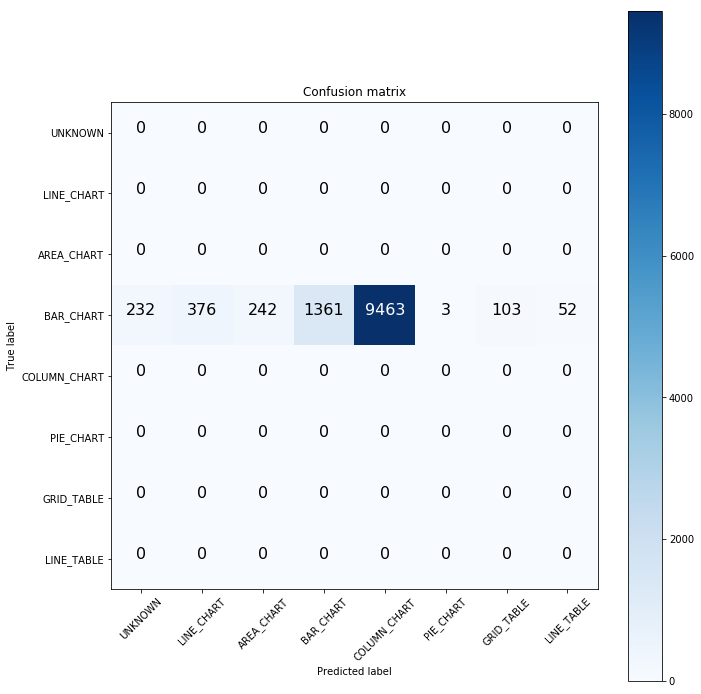

In [14]:
# bar数据的混淆矩阵
cm = confusion_matrix(y_bar_true, y_bar_pred, labels=classes)
plot_confusion_matrix(cm, classes)

In [17]:
# 归类到对应的文件夹里
import shutil
import time
import os

start = time.clock()

for i, key in tqdm(enumerate(y_bar_pred)):
    if not os.path.exists('new_class/' + key): os.mkdir('new_class/' + key)
    shutil.copy(sorted(bar_set)[i], 'new_class/' + key)
print('excuting time:%s s' % (time.clock() - start))

11832it [01:01, 192.39it/s]

excuting time:62.34487300000001 s


### predict line_data

In [22]:
line_set = glob(test_dir_set[1] + '/*')
print(len(line_set))

13704


In [23]:
# get y_true
y_line_true = ['LINE_CHART'] * 13704

In [24]:
from tqdm import tqdm
from PIL import Image
import numpy as np
import time

start = time.clock()

y_line_pred = predict_on_cvset(line_set)

print('excute time:%s'%(time.clock()-start))

13704it [07:44, 29.51it/s]

excute time:488.31790000000007


In [25]:
# 存储数据
import json

with open('line_pred_list.json', 'w') as f:
    json.dump(y_line_pred, f)

[[    0     0     0     0     0     0     0     0]
 [  375 11945   612   126   362     2   221    61]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]]


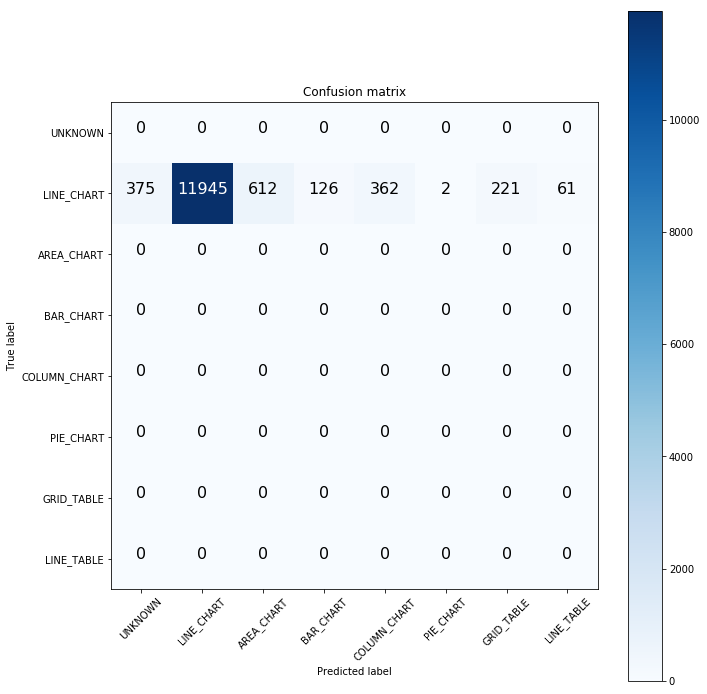

In [23]:
# Line数据的混淆矩阵
cm = confusion_matrix(y_line_true, y_line_pred, labels=classes)
plot_confusion_matrix(cm, classes)

In [26]:
# 归类到对应的文件夹里
import shutil
import time
import os

start = time.clock()

for i, key in tqdm(enumerate(y_bar_pred)):
    if not os.path.exists('new_class_line'): os.mkdir('new_class_line')
    if not os.path.exists('new_class_line/' + key): os.mkdir('new_class_line/' + key)
    shutil.copy(sorted(line_set)[i], 'new_class_line/' + key)
print('excuting time:%s s' % (time.clock() - start))

11832it [01:19, 148.31it/s]

excuting time:80.86482899999999 s


### predict UNKNOWN

In [9]:
UNKNOWN_set = glob(test_dir_set[2] + '/*')
print(len(UNKNOWN_set))

226


In [10]:
# get y_true
y_unkn_true = ['UNKNOWN'] * 226
# print(y_unkn_true)

In [11]:
from tqdm import tqdm
from PIL import Image
import numpy as np
import time

start = time.clock()

y_unkn_pred = predict_on_set(UNKNOWN_set)

print('excute time:%s'%(time.clock()-start))

226it [00:07, 28.72it/s]

excute time:8.267772


[[213   9   0   2   1   1   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


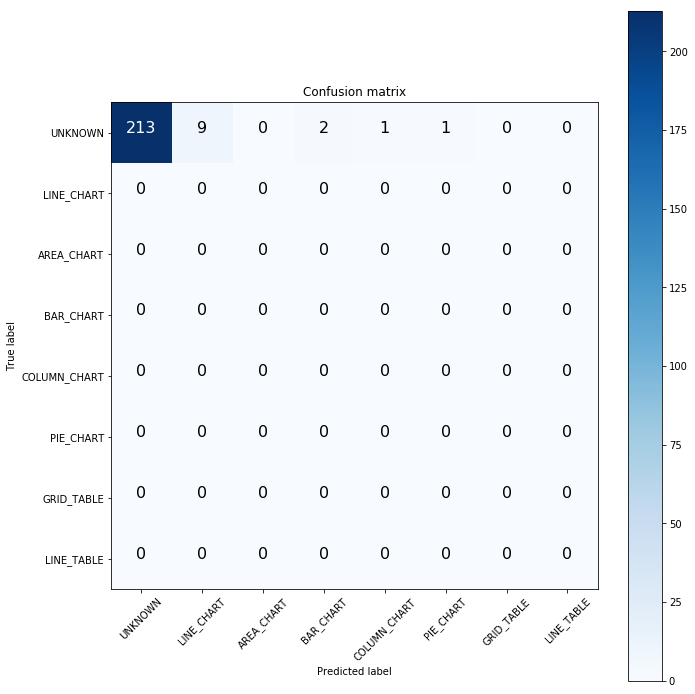

In [12]:
# UNKNOWN数据的混淆矩阵
cm = confusion_matrix(y_unkn_true, y_unkn_pred, labels=classes)
plot_confusion_matrix(cm, classes)

### predict pie_data

In [27]:
pie_set = glob(test_dir_set[3] + '/*')
print(len(pie_set))

14914


In [28]:
# get y_true
y_pie_true = ['PIE_CHART'] * 14914
# print(y_lcc_true)

In [170]:
def predict_on_set(pie_set):
    y_pie_pred = []
    y_pie_prob = []

    for i, key in tqdm(enumerate(sorted(pie_set))):
#     print(key)
        img = Image.open(key).convert("RGB")
        img_arr = np.array(img.resize((299, 299))) / 255.
        y_pie_pred0 = model.predict(np.expand_dims(img_arr, axis=0))
        y_pie_prob.append(y_pie_pred0[0])
        label_index = np.array(get_max_index(y_pie_pred0[0]))[0]
        y_pie_pred.append(classes[int(label_index)])
#     print(y_pie_pred)
    return y_pie_pred

In [29]:
from tqdm import tqdm
from PIL import Image
import numpy as np
import time

start = time.clock()

y_pie_pred = predict_on_set(pie_set)

print('excute time:%s'%(time.clock()-start))

14914it [06:59, 35.57it/s]

excute time:437.5472010000001


In [30]:
# 存储数据
import json

with open('pie_pred_list.json', 'w') as f:
    json.dump(y_pie_pred, f)

[[    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [  353   136    27   111   273 13981    16    17]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]]


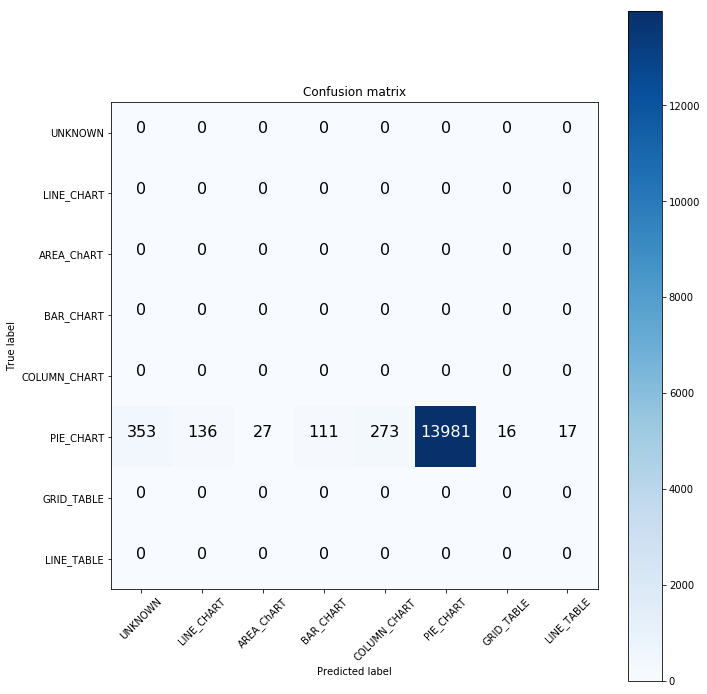

In [172]:
# UNKNOWN数据的混淆矩阵
cm = confusion_matrix(y_pie_true, y_pie_pred, labels=classes)
plot_confusion_matrix(cm, classes)

In [31]:
# 归类到对应的文件夹里
import shutil
import time
import os

start = time.clock()

for i, key in tqdm(enumerate(y_pie_pred)):
    if not os.path.exists('new_class_pie'): os.mkdir('new_class_pie')
    if not os.path.exists('new_class_pie/' + key): os.mkdir('new_class_pie/' + key)
    shutil.copy(sorted(pie_set)[i], 'new_class_pie/' + key)
print('excuting time:%s s' % (time.clock() - start))

14914it [01:42, 144.85it/s]

excuting time:104.40361400000006 s


### predict line_column_combine 组合图预测类别

In [13]:
line_column_set = glob(test_dir_set[4] + '/*')
print(len(line_column_set))

509


In [14]:
# get y_true
y_lcc_true = ['COLUMN_CHART'] * 509
# print(y_lcc_true)

In [16]:
from tqdm import tqdm
from PIL import Image
import numpy as np
import time

start = time.clock()

y_lcc_pred = predict_on_set(line_column_set)

print('excute time:%s'%(time.clock()-start))

509it [00:15, 33.22it/s]

excute time:15.970405


[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [ 40 330   9   1 106   0  21   2]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


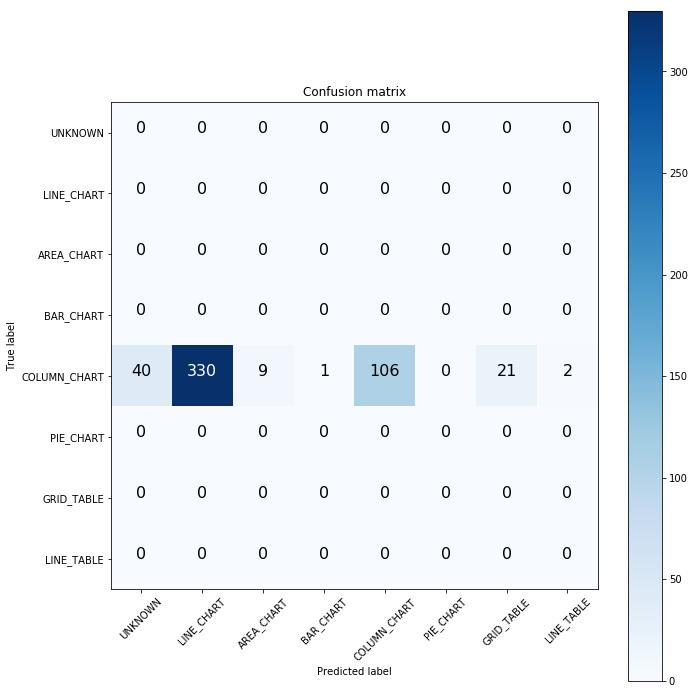

In [17]:
# LINE_CHART_COLUMN_CHART数据的混淆矩阵
cm = confusion_matrix(y_lcc_true, y_lcc_pred, labels=classes)
plot_confusion_matrix(cm, classes)